# EDA Zestawu danych - Titanic

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

### Zapraszam na moją analize danych dotyczącą pasażerów Titanica.
### Spróbuję odpowiedzieć na pytanie o przeżywalność pasażerów rejsu.


In [1]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import Markdown
import warnings
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Wczytanie danych
df = pd.read_csv('26__titanic.csv', sep=",")

![Alternatywny tekst](https://cdn.pixabay.com/photo/2022/01/27/17/51/titanic-6972725_1280.jpg)

## 1) Wstepna inspekcja danych:

In [3]:

df.shape

(1310, 14)

In [4]:
Markdown(f"""
#### Dane zawierają **{len(df)}** wierszy i **{len(df.columns)}** kolumn.
""")


#### Dane zawierają **1310** wierszy i **14** kolumn.


### Ogólny przegląd:

In [5]:


df.head() 

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [6]:
# Wyświetlenie 5 ostatnich wierszy
df.tail()

pclass  survived                       name     sex   age  sibsp  parch  \
1305     3.0       0.0      Zabour, Miss. Thamine  female   NaN    1.0    0.0   
1306     3.0       0.0  Zakarian, Mr. Mapriededer    male  26.5    0.0    0.0   
1307     3.0       0.0        Zakarian, Mr. Ortin    male  27.0    0.0    0.0   
1308     3.0       0.0         Zimmerman, Mr. Leo    male  29.0    0.0    0.0   
1309     NaN       NaN                        NaN     NaN   NaN    NaN    NaN   

      ticket     fare cabin embarked boat   body home.dest  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN  
1309     NaN      NaN   NaN      NaN  NaN    NaN       NaN

In [7]:
# Wyświetlenie 20 losowych wierszy
df.sample(20)

pclass  survived                                             name  \
5        1.0       1.0                              Anderson, Mr. Harry   
518      2.0       0.0                     Nicholls, Mr. Joseph Charles   
976      3.0       0.0                              Lockyer, Mr. Edward   
677      3.0       0.0                        Bostandyeff, Mr. Guentcho   
1206     3.0       0.0                            Skoog, Master. Harald   
827      3.0       0.0               Goodwin, Master. William Frederick   
67       1.0       1.0                             Cherry, Miss. Gladys   
820      3.0       1.0  Goldsmith, Master. Frank John William "Frankie"   
111      1.0       1.0                   Fortune, Miss. Alice Elizabeth   
193      1.0       1.0                Madill, Miss. Georgette Alexandra   
123      1.0       1.0                 Frolicher-Stehli, Mr. Maxmillian   
901      3.0       0.0         Johnston, Miss. Catherine Helen "Carrie"   
1021     3.0       0.0                            Mionoff, Mr. Stoytcho   
1197     3.0       0.0                  Shellard, Mr. Frederick William   
713      3.0       0.0                              Charters, Mr. David   
20       1.0       1.0                    Beckwith, Mr. Richard Leonard   
411      2.0       0.0                        Funk, Miss. Annie Clemmer   
923      3.0       1.0                                Kelly, Miss. Mary   
1008     3.0       0.0                         McGowan, Miss. Katherine   
351      2.0       0.0                Brown, Mr. Thomas William Solomon   

         sex   age  sibsp  parch      ticket      fare        cabin embarked  \
5       male  48.0    0.0    0.0       19952   26.5500          E12        S   
518     male  19.0    1.0    1.0  C.A. 33112   36.7500          NaN        S   
976     male   NaN    0.0    0.0        1222    7.8792          NaN        S   
677     male  26.0    0.0    0.0      349224    7.8958          NaN        S   
1206    male   4.0    3.0    2.0      347088   27.9000          NaN        S   
827     male  11.0    5.0    2.0     CA 2144   46.9000          NaN        S   
67    female  30.0    0.0    0.0      110152   86.5000          B77        S   
820     male   9.0    0.0    2.0      363291   20.5250          NaN        S   
111   female  24.0    3.0    2.0       19950  263.0000  C23 C25 C27        S   
193   female  15.0    0.0    1.0       24160  211.3375           B5        S   
123     male  60.0    1.0    1.0       13567   79.2000          B41        C   
901   female   NaN    1.0    2.0  W./C. 6607   23.4500          NaN        S   
1021    male  28.0    0.0    0.0      349207    7.8958          NaN        S   
1197    male   NaN    0.0    0.0   C.A. 6212   15.1000          NaN        S   
713     male  21.0    0.0    0.0  A/5. 13032    7.7333          NaN        Q   
20      male  37.0    1.0    1.0       11751   52.5542          D35        S   
411   female  38.0    0.0    0.0      237671   13.0000          NaN        S   
923   female   NaN    0.0    0.0       14312    7.7500          NaN        Q   
1008  female  35.0    0.0    0.0        9232    7.7500          NaN        Q   
351     male  60.0    1.0    1.0       29750   39.0000          NaN        S   

     boat   body                              home.dest  
5       3    NaN                           New York, NY  
518   NaN  101.0                 Cornwall / Hancock, MI  
976   NaN  153.0                                    NaN  
677   NaN    NaN                   Bulgaria Chicago, IL  
1206  NaN    NaN                                    NaN  
827   NaN    NaN   Wiltshire, England Niagara Falls, NY  
67      8    NaN                        London, England  
820   C D    NaN      Strood, Kent, England Detroit, MI  
111    10    NaN                           Winnipeg, MB  
193     2    NaN                           St Louis, MO  
123     5    NaN                    Zurich, Switzerland  
901   NaN    NaN                                    N

### Wartości unikalne & typy danych:

In [8]:
# Sprawdzenie unikatowych wartości 
df.nunique() 

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [9]:
# Sprawdzenie jakie typy danych sa w zbiorze
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## 2) Czyszczenie i transformacja danych:

In [10]:
# Sprawdzenie gdzie wystepują duplikaty
df.loc[df.duplicated]

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []

In [11]:
# Sprawdzenie brakujacych danych.  
df.isnull().sum() 

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [12]:

df = df.dropna(thresh=7)

In [13]:
# Założenie: 'pclass' jest kolumną typu float
df['pclass'] = df['pclass'].astype(int)
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)

In [14]:

df.dtypes

pclass         int32
survived     float64
name          object
sex           object
age          float64
sibsp          int32
parch          int32
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [15]:
# Funkcja do transformacji kolumny 'body'
def transform_body_value(body_value, survived_value):
    if pd.notna(body_value):
        return True
    elif pd.isna(body_value) and survived_value == 0.0:
        return True
    elif pd.isna(body_value) and survived_value == 1.0:
        return False

# Zastosowanie funkcji na kolumnie 'body'
df['body'] = df.apply(lambda row: transform_body_value(row['body'], row['survived']), axis=1)

# Zmiana wartości w kolumnie 'survived' z 0.0 na False i 1.0 na True
df['survived'] = df['survived'].map({0.0: False, 1.0: True})

In [16]:

df.sample(5)

pclass  survived                                               name  \
334       2     False                      Banfield, Mr. Frederick James   
919       3     False   Katavelas, Mr. Vassilios ("Catavelas Vassilios")   
63        1      True  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
749       3     False  Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...   
858       3      True                                      Hee, Mr. Ling   

        sex   age  sibsp  parch            ticket     fare cabin embarked  \
334    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S   
919    male  18.5      0      0              2682   7.2292   NaN        C   
63   female  47.0      1      0       W.E.P. 5734  61.1750   E31        S   
749  female  28.0      1      1            347080  14.4000   NaN        S   
858    male   NaN      0      0              1601  56.4958   NaN        S   

    boat   body                        home.dest  
334  NaN   True  Plymouth, Dorset / Houghton, MI  
919  NaN   True                              NaN  
63     4  False                       Amenia, ND  
749  NaN   True                      Stanton, IA  
858    C  False                              NaN

In [17]:

df.dtypes

pclass         int32
survived        bool
name          object
sex           object
age          float64
sibsp          int32
parch          int32
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body            bool
home.dest     object
dtype: object

## 3) Analiza jednowymiarowa:

In [18]:
# Podsumowanie statystyk dla wszystkich kolumn numerycznych 
df.describe()  

pclass          age        sibsp        parch         fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881135     0.498854     0.385027    33.295479
std       0.837836    14.413500     1.041658     0.865560    51.758668
min       1.000000     0.166700     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200

### Wykresy:

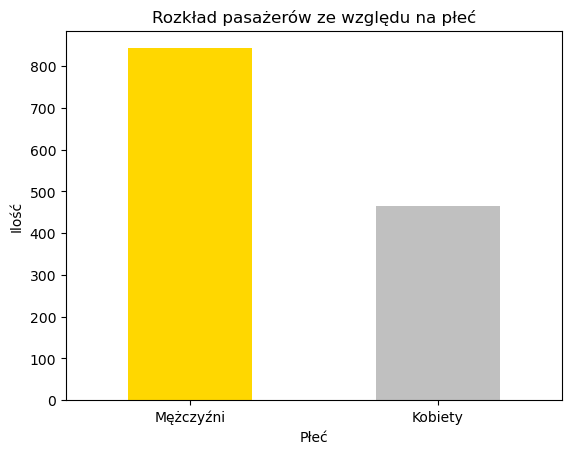

In [19]:

ax = df['sex'].value_counts() \
    .plot(kind='bar', 
          color=['gold', 'silver'],
          title='Rozkład pasażerów ze względu na płeć',
    )
ax.set_xticklabels(['Mężczyźni', 'Kobiety'], rotation=0)
ax.set_xlabel('Płeć')
ax.set_ylabel('Ilość')
plt.show()

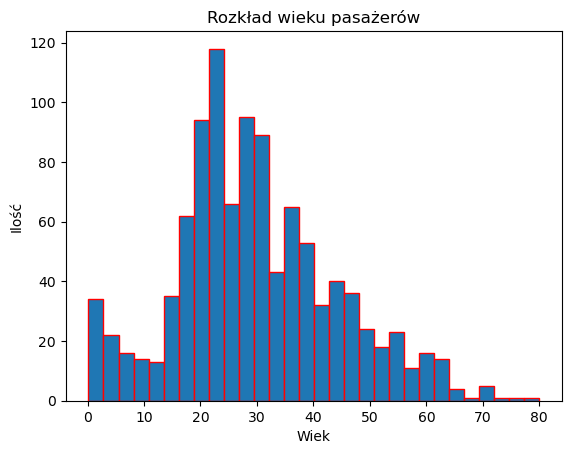

In [20]:

ax = df['age'].plot(kind='hist', 
                    bins=30, 
                    edgecolor='red',
                    title='Rozkład wieku pasażerów')
ax.set_xlabel('Wiek')
ax.set_ylabel('Ilość')
plt.show()

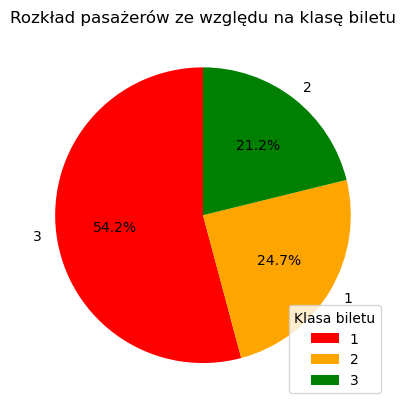

In [21]:

ax = df['pclass'].value_counts().plot(
    kind='pie',
    title='Rozkład pasażerów ze względu na klasę biletu',
    autopct='%1.1f%%',
    colors=['red', 'orange', 'green'],
    startangle=90
)

ax.legend(title='Klasa biletu', labels=['1', '2', '3'])
ax.set_ylabel('')
plt.show()


## 4) Analiza dwuwymiarowa:

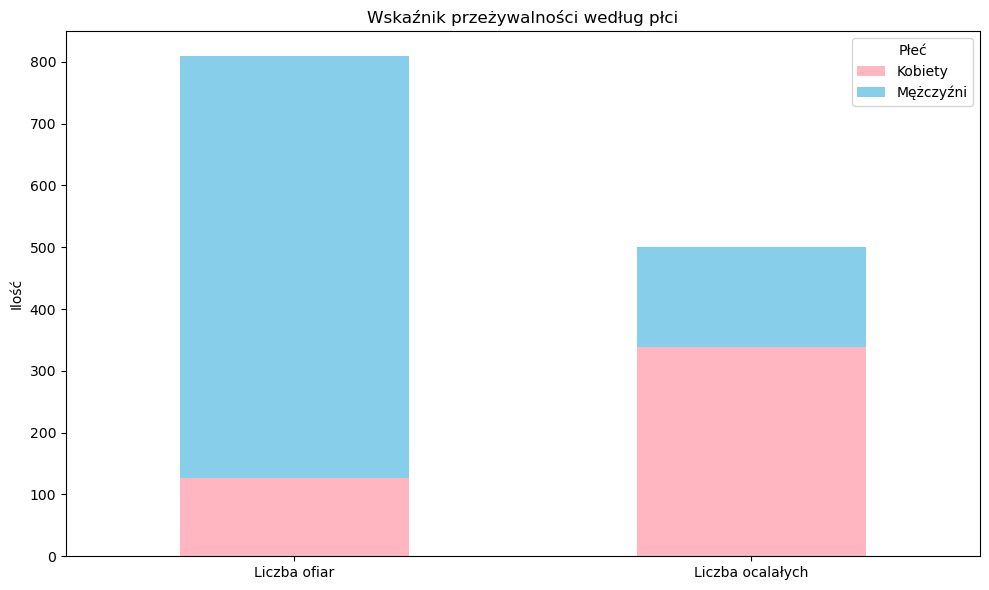

In [22]:

survival_sex_counts = df.groupby(['survived', 'sex']).size().unstack()

ax = survival_sex_counts.plot(
    kind='bar',
    stacked=True,
    color=[ 'lightpink', 'skyblue'],
    title='Wskaźnik przeżywalności według płci',
    figsize=(10, 6)  
)

ax.set_xticklabels(['Liczba ofiar', 'Liczba ocalałych'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Ilość')
ax.legend(title='Płeć', labels=['Kobiety', 'Mężczyźni'])
plt.tight_layout()
plt.show()

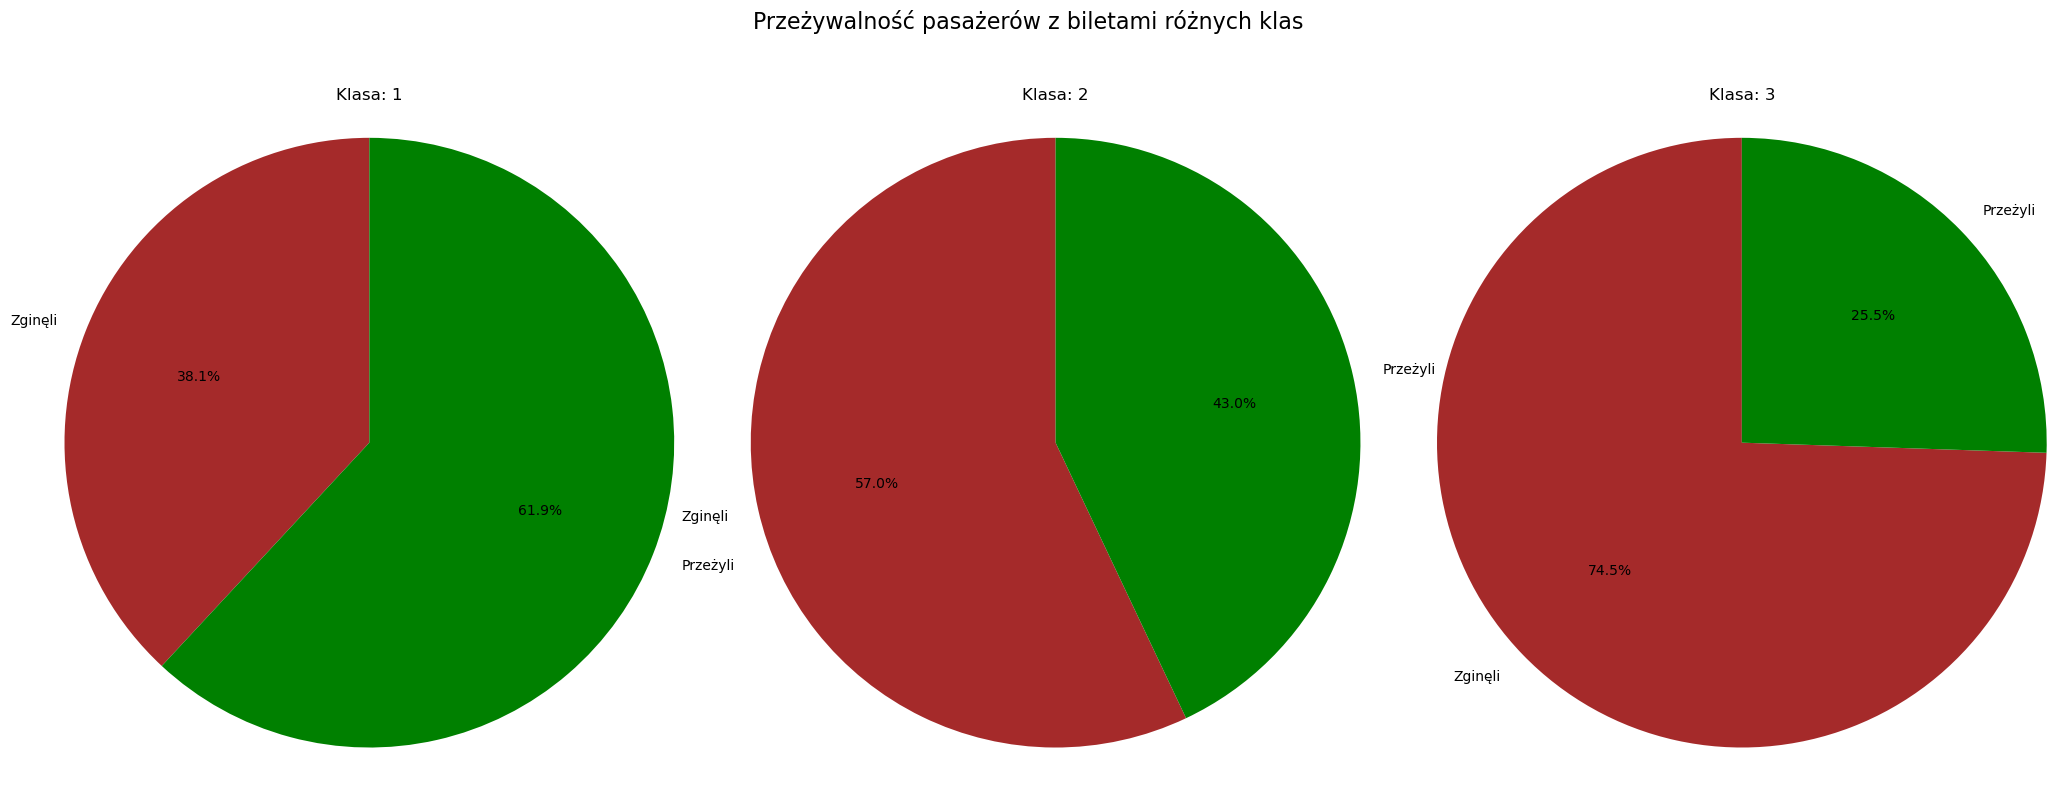

In [23]:

sur_df = df.dropna(subset=['pclass', 'survived'])
# Przygotuj dane do wykresu
survival_by_class = sur_df.groupby('pclass')['survived'].value_counts(normalize=True).unstack()

# Ustawienia wykresów
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Przeżywalność pasażerów z biletami różnych klas', fontsize=16)

classes = survival_by_class.index

# Iteracja przez klasy biletów, aby stworzyć wykresy kołowe
for i, cls in enumerate(classes):
    axes[i].pie(survival_by_class.loc[cls], labels=['Zginęli', 'Przeżyli'], autopct='%1.1f%%', startangle=90, colors=['brown', 'green'])
    axes[i].set_title(f'Klasa: {cls}')
    axes[i].axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

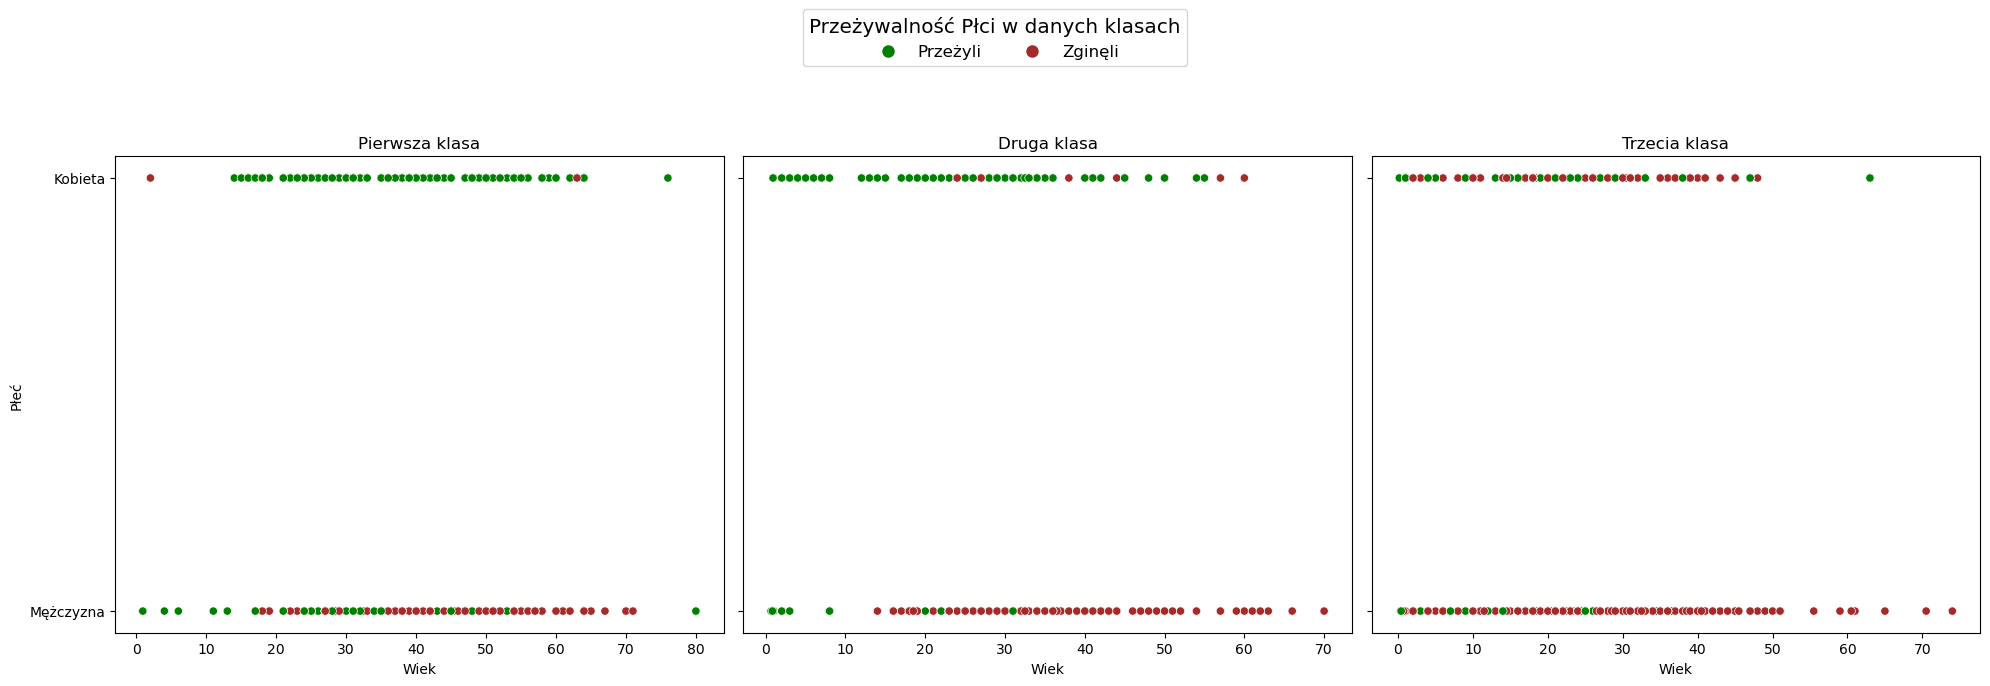

In [24]:

titanic_df = df.dropna(subset=['age', 'sex', 'survived', 'pclass'])

# Mapowanie etykiet dla płci i klasy
sex_map = {'female': 'Kobieta', 'male': 'Mężczyzna'}
class_labels = ["Pierwsza klasa", "Druga klasa", "Trzecia klasa"]

# Tworzenie subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Iteracja przez poszczególne klasy
for i, (ax, (cls, data)) in enumerate(zip(axes, titanic_df.groupby('pclass'))):
    # Wyłączamy legendę na wykresie poprzez ustawienie legend=False
    sns.scatterplot(x='age', y='sex', data=data, hue='survived', ax=ax, palette={1: 'green', 0: 'brown'}, legend=False)

    ax.set_title(class_labels[i])
    ax.set_xlabel('Wiek')
    ax.set_ylabel('Płeć')

    # Ustalanie ticków i etykiet
    sex_labels = [sex_map[sex] for sex in sorted(data['sex'].unique())]
    ax.set_yticks(range(len(sex_labels)))
    ax.set_yticklabels(sex_labels)

# Ręczne pobieranie uchwytów (handles) i etykiet dla legendy
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Przeżyli'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', markersize=10, label='Zginęli')]

# Dodaj teraz wspólną legendę dla całej figury
fig.legend(handles, ['Przeżyli', 'Zginęli'], title='Przeżywalność Płci w danych klasach', loc='upper center', fontsize='large', title_fontsize='x-large', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Sprawdzenie przeżywalności dla najmłodszych pasażerów:

In [25]:
# Analiza dzieci biorących udział w katastrofie
children_df = df[df['age'] < 18]
children_df.head(5)

pclass  survived                                 name     sex      age  \
1        1      True       Allison, Master. Hudson Trevor    male   0.9167   
2        1     False         Allison, Miss. Helen Loraine  female   2.0000   
53       1     False               Carrau, Mr. Jose Pedro    male  17.0000   
54       1      True  Carter, Master. William Thornton II    male  11.0000   
55       1      True            Carter, Miss. Lucile Polk  female  14.0000   

    sibsp  parch  ticket    fare    cabin embarked boat   body  \
1       1      2  113781  151.55  C22 C26        S   11  False   
2       1      2  113781  151.55  C22 C26        S  NaN   True   
53      0      0  113059   47.10      NaN        S  NaN   True   
54      1      2  113760  120.00  B96 B98        S    4  False   
55      1      2  113760  120.00  B96 B98        S    4  False   

                          home.dest  
1   Montreal, PQ / Chesterville, ON  
2   Montreal, PQ / Chesterville, ON  
53              Montevideo, Uruguay  
54                    Bryn Mawr, PA  
55                    Bryn Mawr, PA

In [26]:
children_counts = children_df['sex'].value_counts()
print(children_counts)

sex
male      82
female    72
Name: count, dtype: int64


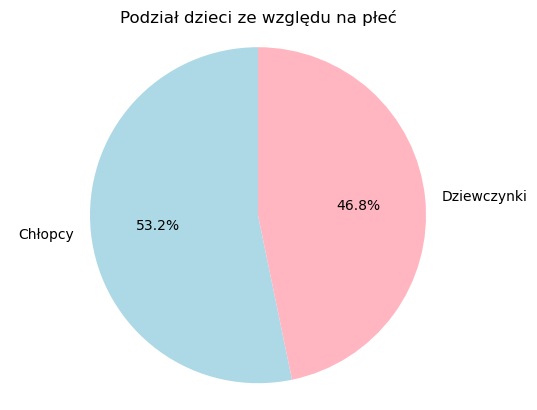

In [27]:

sex_map = {'female': 'Dziewczynki', 'male': 'Chłopcy'}

children_df['sex'].map(sex_map).value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  
    startangle=90,        
    colors=['lightblue', 'lightpink'],  
    title='Podział dzieci ze względu na płeć'
)

plt.ylabel('')  
plt.axis('equal')  
plt.show()

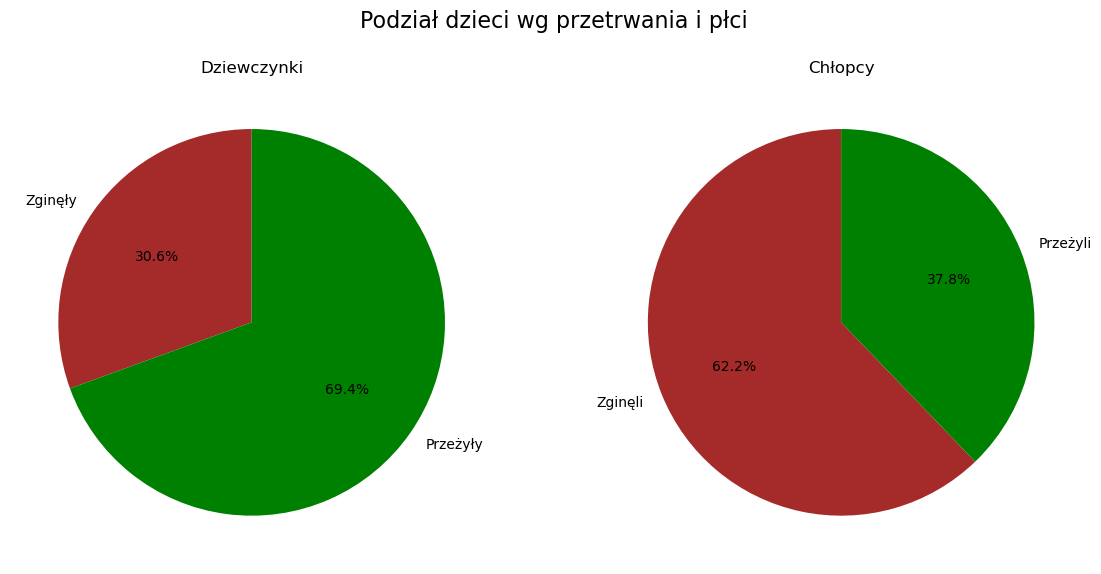

In [28]:

grouped = children_df.groupby(['sex', 'survived']).size().unstack()

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

colors = ['brown', 'green']

grouped.loc['female'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[0],
    colors=colors,
    title='Dziewczynki',
    labels=['Zginęły', 'Przeżyły'],
    ylabel=''
)

grouped.loc['male'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[1],
    colors=colors,
    title='Chłopcy',
    labels=['Zginęli', 'Przeżyli'],
    ylabel=''
)

fig.suptitle('Podział dzieci wg przetrwania i płci', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Sprawdzenie rozkładów i wykrycie wzorców w zbiorze

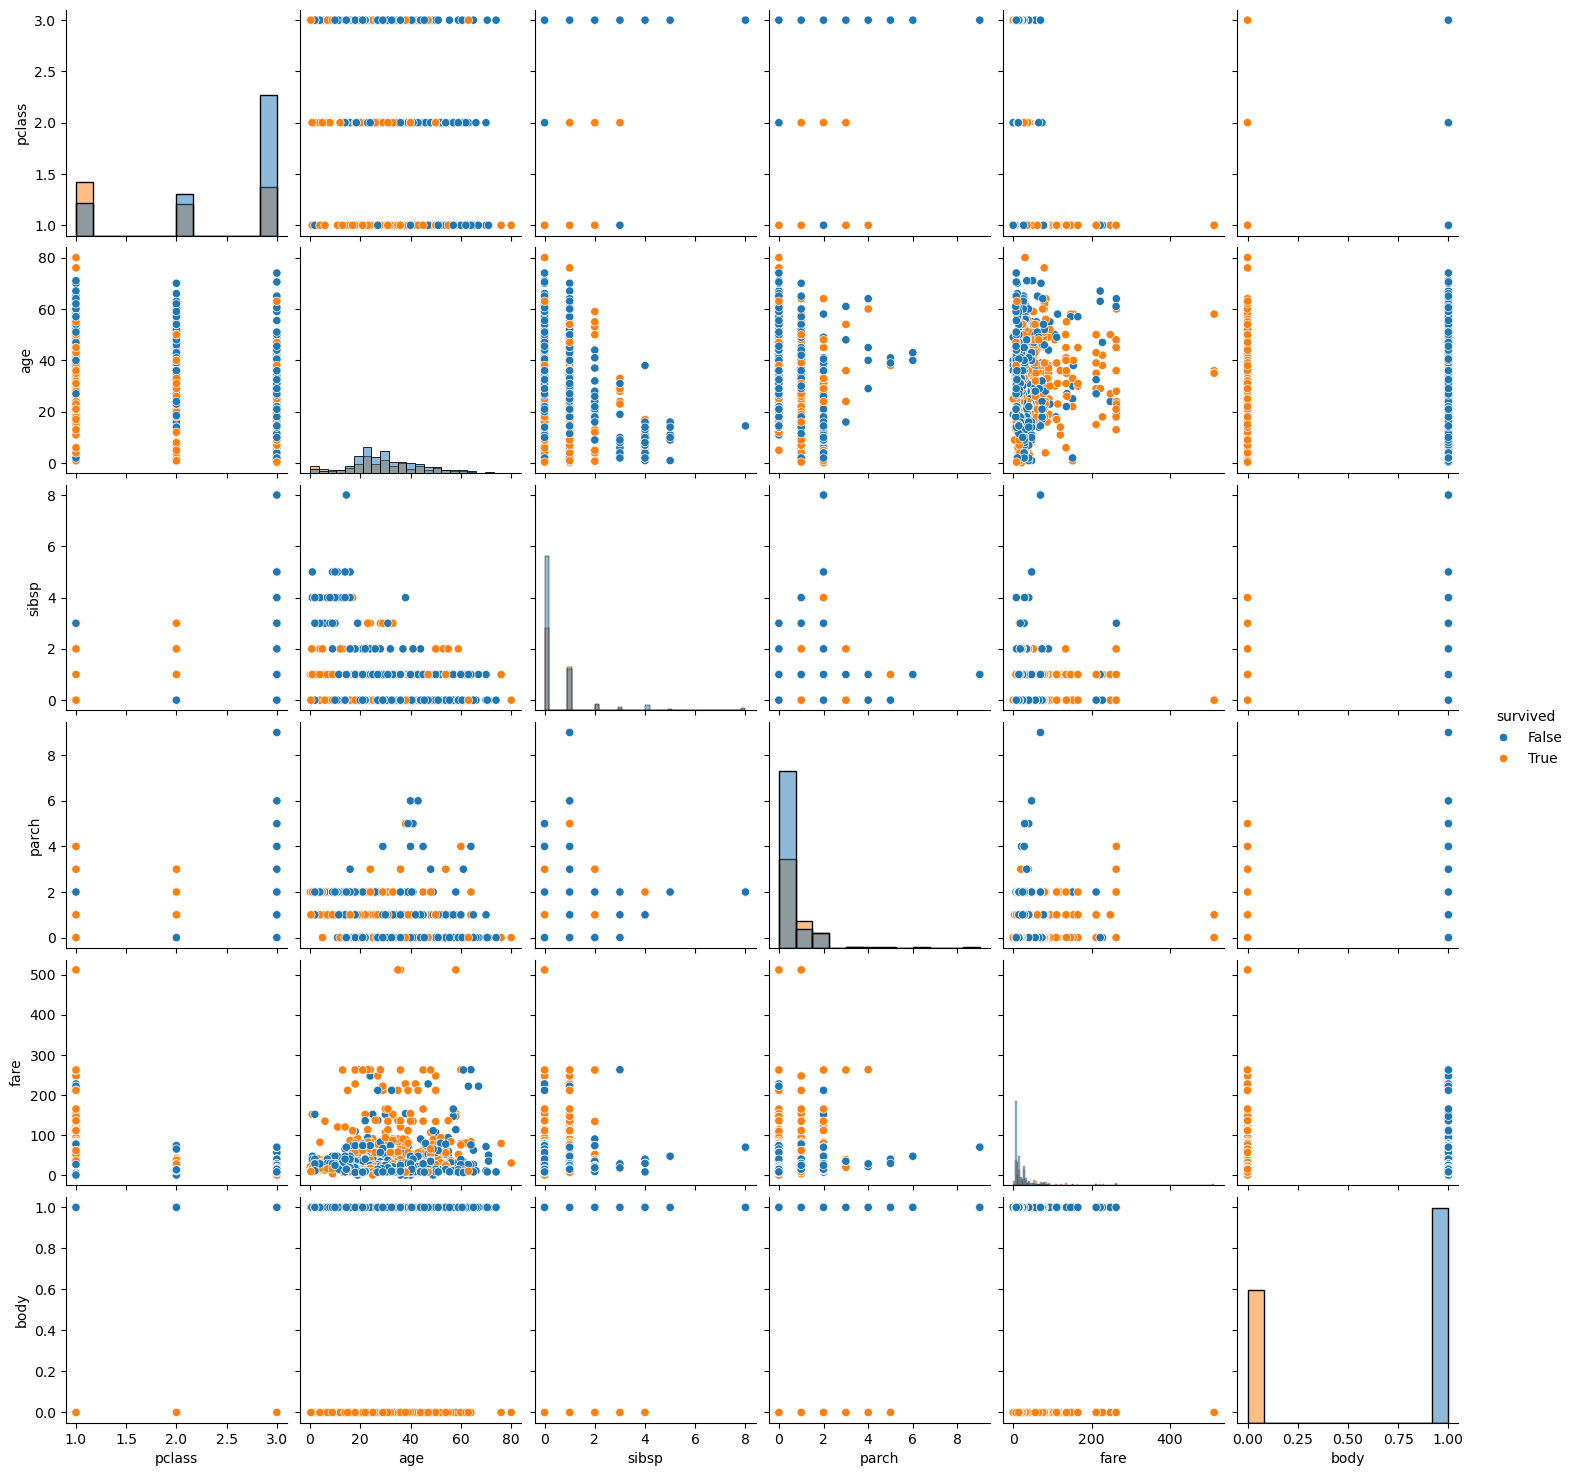

In [29]:
sns.pairplot(df, hue='survived', diag_kind="hist")

### Sprawdzenie korelacji miedzy kolumnami:

In [30]:
df_corr = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']].dropna().corr()
df_corr

pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.319979 -0.411086  0.047746  0.017685 -0.565255  0.319979
survived -0.319979  1.000000 -0.053958 -0.012657  0.114091  0.249164 -1.000000
age      -0.411086 -0.053958  1.000000 -0.243139 -0.150241  0.178739  0.053958
sibsp     0.047746 -0.012657 -0.243139  1.000000  0.374291  0.141184  0.012657
parch     0.017685  0.114091 -0.150241  0.374291  1.000000  0.216723 -0.114091
fare     -0.565255  0.249164  0.178739  0.141184  0.216723  1.000000 -0.249164
body      0.319979 -1.000000  0.053958  0.012657 -0.114091 -0.249164  1.000000

<Axes: >

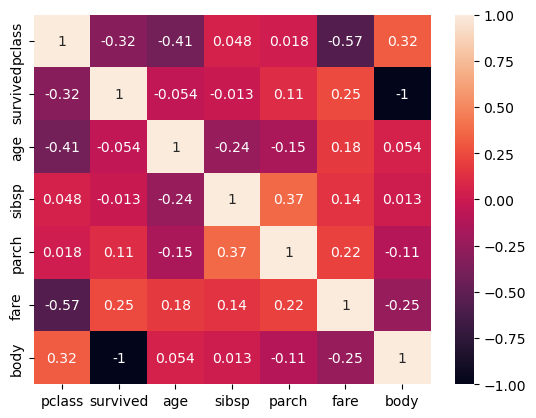

In [31]:
sns.heatmap(df_corr, annot=True)

<br><br>

## **Analiza danych dotyczących pasażerów ujawnia kilka istotnych spostrzeżeń i wniosków:**

### **Niekompletność Danych**: 
#### - Znaczące braki danych występują w kolumnach dotyczących kabin, łodzi ratunkowych i ciał,
####  co utrudnia pełną rekonstrukcję warunków katastrofy.

### **Dane Demograficzne**: 
#### - Na statku znajdowało się 466 kobiet i 843 mężczyzn. Większość ofiar stanowili 
####  mężczyźni – przeżyło zaledwie 161 z 843, podczas gdy ze 466 kobiet przeżyło 339.

### **Wiek Pasażerów**: 
#### - Średnia wieku pasażerów wynosiła 29 lat, co wskazuje na młody profil demograficzny podróżnych.

### **Podział Klasy**: 
#### - Pasażerowie byli rozmieszczeni pomiędzy trzy klasy: 24.7% w pierwszej, 21.2% w drugiej oraz znacząca większość, 
####  54.2%, w trzeciej klasie.

### **Przeżywalność**: 
#### - Ogólnie rzecz biorąc, większość pasażerów nie przeżyła katastrofy. Szczególnie narażeni byli mężczyźni oraz pasażerowie trzeciej klasy. 
####  Kobiety, a zwłaszcza te z pierwszej i drugiej klasy, miały wyższą szansę na przeżycie.

### **Dzieci**: 
#### - Na pokładzie znajdowało się 82 chłopców i 72 dziewczynki poniżej 18 roku życia. Przeżywalność wśród dzieci była
####  wyższa w przypadku dziewczynek (69.4%) niż chłopców (37.8%).

### **Wpływy na Przeżywalność**: 
#### - Analiza korelacji wykazała, że na przeżywalność wpływały czynniki takie jak obecność rodziny na pokładzie, 
####  cena biletów (które były wysoko skorelowane z przeżywalnością) oraz klasa biletu.
<br>

## **Podsumowując, analiza danych pozwala na zrozumienie nie tylko demografii pasażerów,** 
##  **ale także kluczowych czynników wpływających na przeżywalność w katastrofie.**

In [33]:
!jupyter nbconvert edatitanic.ipynb --to html --no-input --no-prompt --output edatitanic.html

[NbConvertApp] Converting notebook edatitanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 1180251 bytes to edatitanic.html
